In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import os
import numpy as np

In [18]:
from utils.utils import load_data

FOLDER_PATH = "projekt2_data"

data_df = load_data(FOLDER_PATH, df_delimiter=",")
data_df.head(10)

,SentenceId,Phrase,Sentiment,df_
0,1,a series of escapades demonstrating the adage ...,1,0
1,1,a series of escapades demonstrating the adage ...,2,0
2,1,a series,2,0
3,1,a,2,0
4,1,series,2,0
5,1,of escapades demonstrating the adage that what...,2,0
6,1,of,2,0
7,1,escapades demonstrating the adage that what is...,2,0
8,1,escapades,2,0
9,1,demonstrating the adage that what is good for ...,2,0


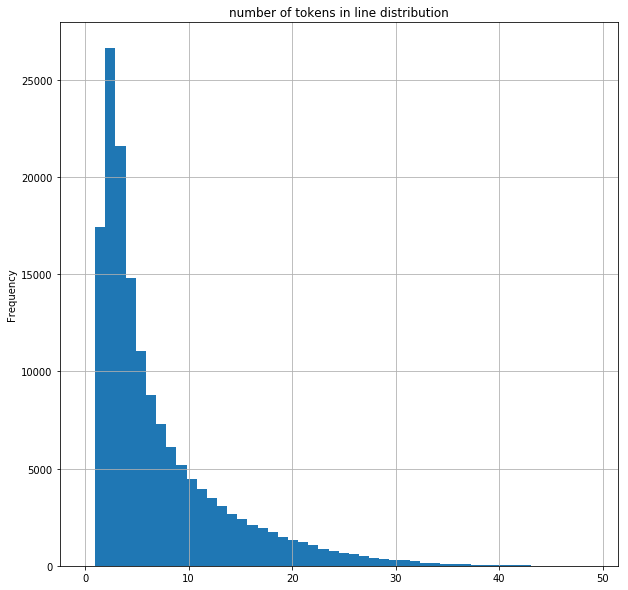

In [19]:
data_df["Phrase"].str.split().str.len().plot(kind="hist", title="number of tokens in line distribution", grid=True, figsize=(10,10), bins=50);

# BERT

In [9]:
!pip install bert-tensorflow

     |████████████████████████████████| 71kB 2.2MB/s 


In [ ]:
from preprocess_data.bert_input_converter import get_proper_input_to_bert
from utils.utils_result import save_report, update_fit_params, evaluation

In [21]:
MAX_LEN_SEQ = 50
N_FINE_TUNE_LAYERS = 1
(x_train, y_train), (x_val, y_val), (x_test, y_test) = get_proper_input_to_bert(data_df, x_label="Phrase", y_label="Sentiment", max_len_seq=MAX_LEN_SEQ)

In [ ]:
# general parameter setting
tensorboard_params = None

fit_params = {
    "x": x_train,
    "y": y_train,
    "epochs": 50,
    "batch_size": 64,
    "validation_data": (x_val, y_val) 
}

input_params = {
    "shape": (MAX_LEN_SEQ, ),
    "dtype": "int32"
}

test_result_dict = {}

## Word Level

### RNN

In [ ]:
from architecture.models import model_rnn

In [14]:
# parameters setting
bert_params_rnn = {
    "trainable": True,
    "output_dim": 768,
    "output_type": "sequence_output",
    "signature": "tokens",
    "n_fine_tune_layers": N_FINE_TUNE_LAYERS
}

model_params_bert_rnn = {
    "input_layer": "bert_input",
    "emb_layer": "Bert",
    "input_params": input_params,
    "emb_params": bert_params_rnn,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_elmo_rnn"
model_bert_rnn = model_rnn(model_params_bert_rnn)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

W0524 16:49:45.866579 140283175266176 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/layers/core.py:143: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 139999 samples, validate on 7800 samples


W0524 16:49:58.464330 140283175266176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
W0524 16:49:58.580917 140283175266176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:102: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Epoch 1/50
139999/139999 [==============================] - 1146s 8ms/sample - loss: 0.9256 - acc: 0.6195 - val_loss: 0.8994 - val_acc: 0.6332
Epoch 2/50
139999/139999 [==============================] - 1161s 8ms/sample - loss: 0.8199 - acc: 0.6623 - val_loss: 1.0085 - val_acc: 0.5823
Epoch 3/50
139999/139999 [==============================] - 1143s 8ms/sample - loss: 0.7700 - acc: 0.6800 - val_loss: 0.9013 - val_acc: 0.6347
Epoch 4/50
139999/139999 [==============================] - 1124s 8ms/sample - loss: 0.7270 - acc: 0.6997 - val_loss: 0.9252 - val_acc: 0.6279
Epoch 5/50
139999/139999 [==============================] - 1123s 8ms/sample - loss: 0.6846 - acc: 0.7178 - val_loss: 0.9522 - val_acc: 0.6264
Epoch 6/50
139999/139999 [==============================] - 1122s 8ms/sample - loss: 0.6439 - acc: 0.7353 - val_loss: 0.9643 - val_acc: 0.6282


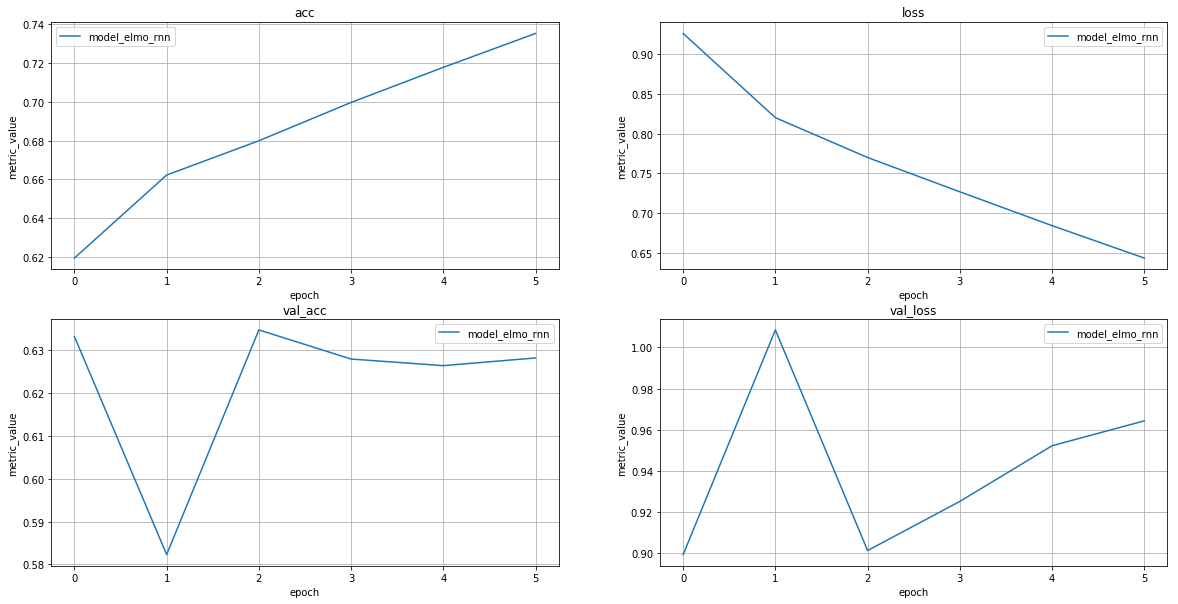

In [15]:
# training
model_bert_rnn.fit(**fit_params);
model_bert_rnn = save_report(model=model_bert_rnn, model_name=model_name, markered_path=markered_path)

In [12]:
# evaluation
test_result_dict = evaluation(model=model_bert_rnn, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)

Wynik na zbiorze testowym modelu model_elmo_rnn, to 0.3577


### CNN

In [ ]:
from architecture.models import model_cnn

In [ ]:
# parameters setting
bert_params_cnn = {
    "trainable": True,
    "output_dim": 768,
    "output_type": "sequence_output",
    "signature": "tokens",
    "n_fine_tune_layers": N_FINE_TUNE_LAYERS
}

model_params_bert_cnn = {
    "input_layer": "bert_input",
    "emb_layer": "Bert",
    "input_params": input_params,
    "emb_params": bert_params_cnn,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_bert_cnn"
model_bert_cnn = model_cnn(model_params_bert_cnn)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

Train on 139999 samples, validate on 7800 samples
Epoch 1/50
139999/139999 [==============================] - 617s 4ms/sample - loss: 0.8999 - acc: 0.6305 - val_loss: 0.8848 - val_acc: 0.6250
Epoch 2/50
139999/139999 [==============================] - 608s 4ms/sample - loss: 0.8035 - acc: 0.6682 - val_loss: 0.8858 - val_acc: 0.6350
Epoch 3/50
139999/139999 [==============================] - 607s 4ms/sample - loss: 0.7505 - acc: 0.6881 - val_loss: 0.8871 - val_acc: 0.6331
Epoch 4/50
139999/139999 [==============================] - 607s 4ms/sample - loss: 0.7000 - acc: 0.7095 - val_loss: 0.9685 - val_acc: 0.6035
Epoch 5/50
139999/139999 [==============================] - 608s 4ms/sample - loss: 0.6532 - acc: 0.7303 - val_loss: 0.9804 - val_acc: 0.6272
Epoch 6/50
139999/139999 [==============================] - 608s 4ms/sample - loss: 0.6041 - acc: 0.7499 - val_loss: 1.0750 - val_acc: 0.5695


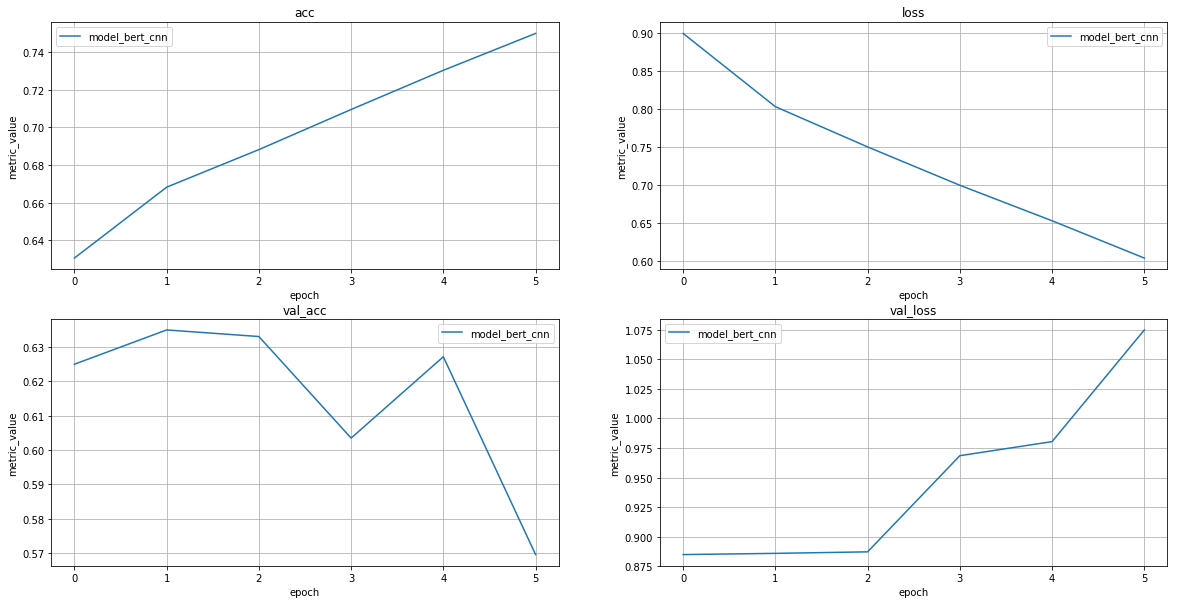

In [27]:
# training
model_bert_cnn.fit(**fit_params);
model_bert_cnn = save_report(model=model_bert_cnn, model_name=model_name, markered_path=markered_path)

In [28]:
# evaluation
test_result_dict = evaluation(model=model_bert_cnn, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)

Wynik na zbiorze testowym modelu model_bert_cnn, to 0.3518


## Phrase Level FFNN

In [ ]:
from architecture.models import model_ffnn

In [ ]:
# parameters setting
bert_params_ffnn = {
    "trainable": True,
    "output_dim": 768,
    "output_type": "pooled_output",
    "signature": "tokens",
    "n_fine_tune_layers": N_FINE_TUNE_LAYERS
}

model_params_bert_ffnn = {
    "input_layer": "bert_input",
    "emb_layer": "Bert",
    "input_params": input_params,
    "emb_params": bert_params_ffnn,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_bert_ffnn"
model_bert_ffnn = model_ffnn(model_params_bert_ffnn)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

Train on 139999 samples, validate on 7800 samples
Epoch 1/50
139999/139999 [==============================] - 590s 4ms/sample - loss: 0.8928 - acc: 0.6348 - val_loss: 0.9379 - val_acc: 0.6162
Epoch 2/50
139999/139999 [==============================] - 586s 4ms/sample - loss: 0.7918 - acc: 0.6708 - val_loss: 0.9964 - val_acc: 0.6060
Epoch 3/50
139999/139999 [==============================] - 588s 4ms/sample - loss: 0.7314 - acc: 0.6947 - val_loss: 0.9318 - val_acc: 0.6247
Epoch 4/50
139999/139999 [==============================] - 589s 4ms/sample - loss: 0.6675 - acc: 0.7214 - val_loss: 1.0409 - val_acc: 0.6329
Epoch 5/50
139999/139999 [==============================] - 588s 4ms/sample - loss: 0.6016 - acc: 0.7478 - val_loss: 1.1180 - val_acc: 0.6233
Epoch 6/50
139999/139999 [==============================] - 589s 4ms/sample - loss: 0.5325 - acc: 0.7772 - val_loss: 1.0315 - val_acc: 0.6092
Epoch 7/50
139999/139999 [==============================] - 590s 4ms/sample - loss: 0.4640 - acc: 

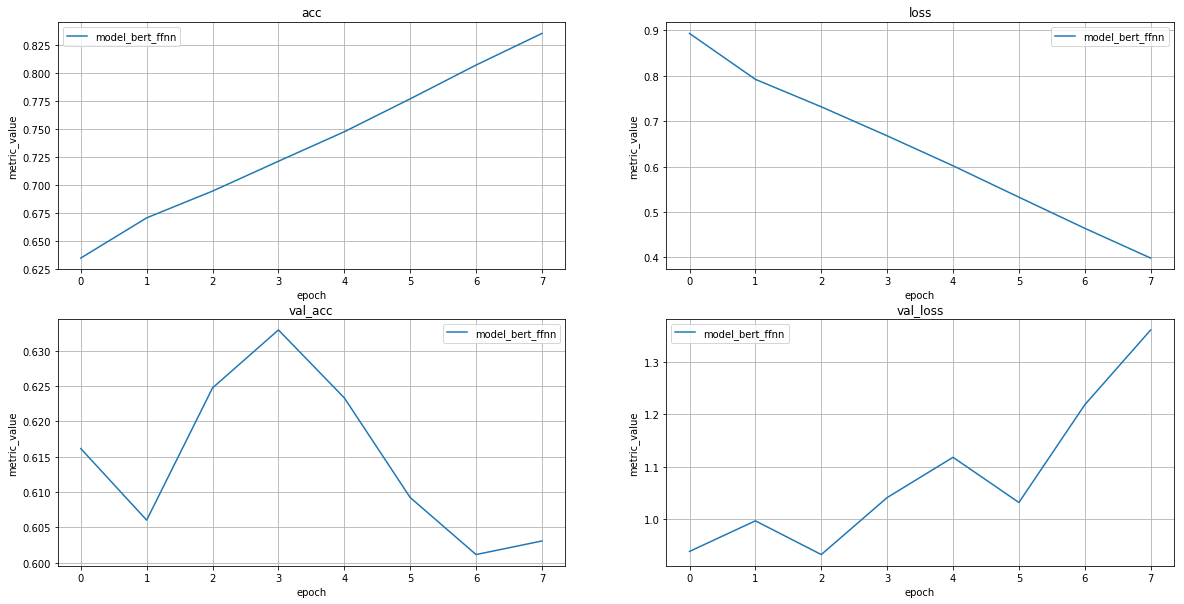

In [31]:
# training
model_bert_ffnn.fit(**fit_params);
model_bert_ffnn = save_report(model=model_bert_ffnn, model_name=model_name, markered_path=markered_path)

In [32]:
# evaluation
test_result_dict = evaluation(model=model_bert_ffnn, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)

Wynik na zbiorze testowym modelu model_bert_ffnn, to 0.3565


# Results

In [33]:
test_result_dict

{'model_bert_cnn': 0.35183288954635106, 'model_bert_ffnn': 0.3564776955950033}

In [ ]:
from utils.utils_result import update_common_history_folder, display_results

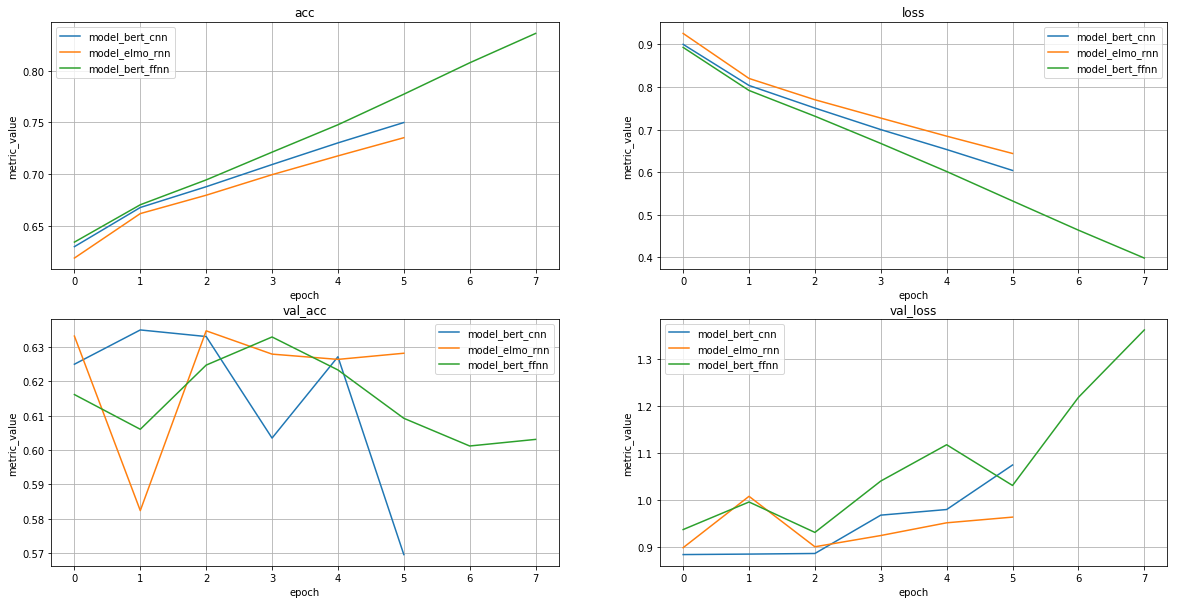

In [42]:
update_common_history_folder("about_model")
display_results("about_models/comparision")